<a href="https://colab.research.google.com/gist/nawwarad/b893d00b3005ed8a02f49f8de1b415d4/bike-sharing-rental-annual-report-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import numpy, pandas, matplotlib, and seaborn to the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving bike_sharing_daily_data.csv to bike_sharing_daily_data (4).csv


In [ ]:
#Import bike_sharing_daily_data.csv to dataframe
bike_data = pd.read_csv(io.BytesIO(uploaded['bike_sharing_daily_data.csv']),
                        parse_dates = ['date'],
                        dayfirst = True)

#replace weekday values with 0 as Monday,1 as Tuesday, etc
bike_data['weekday'].replace({0 : 'Sunday',
                            1 : 'Monday',
                            2 : 'Tuesday',
                            3 : 'Wednesday',
                            4 : 'Thursday',
                            5 : 'Friday',
                            6 : 'Saturday'},
                           inplace = True)

bike_data

,date,season,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,trips
0,2020-01-01,Spring,0,Saturday,0,Misty and Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2020-01-02,Spring,0,Sunday,0,Misty and Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2020-01-03,Spring,0,Monday,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2020-01-04,Spring,0,Tuesday,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2020-01-05,Spring,0,Wednesday,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2021-12-27,Spring,0,Thursday,1,Misty and Cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2021-12-28,Spring,0,Friday,1,Misty and Cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2021-12-29,Spring,0,Saturday,0,Misty and Cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2021-12-30,Spring,0,Sunday,0,Clear/Partly Cloudy,0.255833,0.231700,0.483333,0.350754,364,1432,1796


The dataset starting from 01-01-2020 to 31-12-2021. Therefore, we need to slice the data only for 2020 trips only.

In [ ]:
#Create dataset for bike trips in 2020
bike_trips_2020 = bike_data.loc[:365, ['date','trips']]

bike_trips_2020_date = bike_trips_2020['date']
bike_trips_2020_tr = bike_trips_2020['trips']

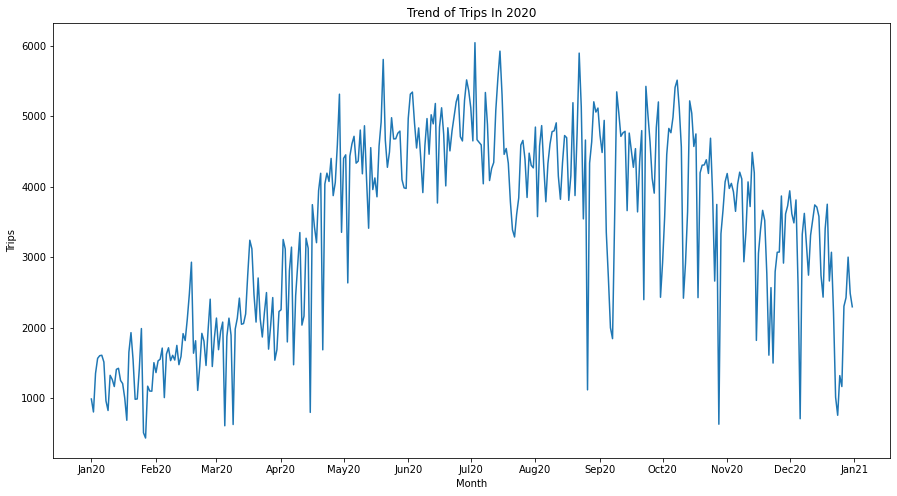

In [ ]:
#Plotting the daily trend of the trips using matplotlib
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(bike_trips_2020_date, bike_trips_2020_tr)

#The aesthetics
ax.set_title('Trend of Trips In 2020')
ax.set_xlabel('Month')
ax.set_ylabel('Trips')

# Helpers to format and locate ticks for dates
from matplotlib.dates import DateFormatter, MonthLocator

## we show xaxis for each months
ax.xaxis.set_major_locator(MonthLocator(interval = 1)) 
## the ticks that show will be in format <Month Year>
ax.xaxis.set_major_formatter(DateFormatter('%b' '%y')) 

There are several things we can look for:
- The trips in 2020 looks fluctuative
- The most amount of trips achieved at middle of July 2020 and the least amount of trips achieved in late January 2020
- There are significant raise amount of trips from May 2020 until July 2020

In [ ]:
#Pivot table for dividing workdays and holiday
trips_workdays = bike_data.pivot (index = 'date', 
                                  columns = 'workingday',
                                  values = 'trips')
trips_workdays.rename(columns = {0:'workingday_trips', 1:'holiday_trips'}, inplace = True)

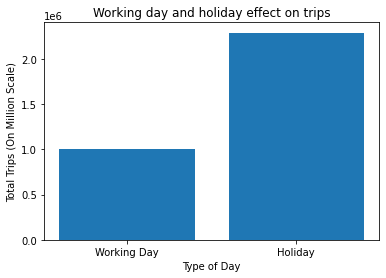

In [ ]:
#Plot the bar chart
# Create a labels for x-axis
day = ["Working Day", 'Holiday']

# Create a list of alues using Numpy for y-axis
sum_trips = np.array(trips_workdays.sum())

# Make the Chart
plt.bar(day, sum_trips)
plt.title('Working day and holiday effect on trips')
plt.xlabel('Type of Day')
plt.ylabel("Total Trips (On Million Scale)")

# Show the Chart
plt.show()

Based on the bar chart, trips on holidays happened two times more than working day trips. So we can conclude that holidays are having affect to the trips count.

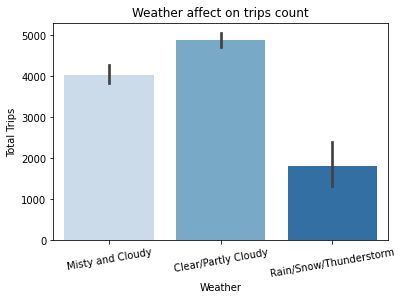

In [ ]:
#Plot weather with trips to analyze the effect
sns.barplot(x = 'weather', y = 'trips', data = bike_data, palette = "Blues")

#Adding the aesthetics
plt.title('Weather affect on trips count')
plt.xlabel('Weather')
plt.xticks(rotation = 10)
plt.ylabel('Total Trips') 

# Show the plot
plt.show()

Based on the bar plot, the weather gives a significant affect to the trips. Most of the members rather to trip during Clear/Partly Cloudy weather, followed by Misty and Cloudy, and the least amount of trips on Rain/Snow/Thunderstorm.

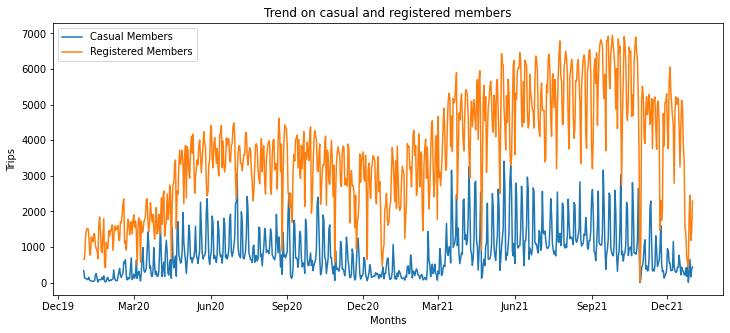

In [ ]:
#Plot casual and registered members by date
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(bike_data.date, bike_data.casual, label = 'Casual Members')
ax.plot(bike_data.date, bike_data.registered, label = 'Registered Members')

#The aesthetics
ax.set_title('Trend on casual and registered members')
ax.set_xlabel('Months')
ax.set_ylabel('Trips')

#Show the label
plt.legend()

# Helpers to format and locate ticks for dates
ax.xaxis.set_major_locator(MonthLocator(interval = 3)) ## we show xaxis axis at an interval of 3 months
ax.xaxis.set_major_formatter(DateFormatter('%b' '%y')) ## the ticks that show will be in format <Month name>

Both trips by casual and registered members are down on January 2021. There are more registered members rather than casual members, but as we can see in the middle of November 2021 the amount of registered users hits the lowest. 

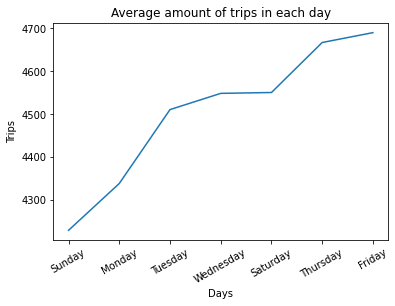

In [ ]:
#Create dataset for average trips in each day of the week
avg_trips = bike_data.groupby(by = 'weekday').mean('trips')
avg_trips = avg_trips.sort_values('trips', ascending = True)

#Plot every day with the amount of trips in each day
plt.plot(avg_trips.index, avg_trips.trips)
  
#The aesthetics
plt.title('Average amount of trips in each day')
plt.xlabel('Days')
plt.xticks(rotation = 30)
plt.ylabel("Trips")

#Show the plot
plt.show()

In the graph above we can see the average amount of trips peaked on Friday and least member doing a trip on Sunday.